In [9]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import basis, destroy, Qobj
from chalmers_qubit.sarimner.processor import SarimnerProcessor

## Longitudinal relaxation

**Initializing the Qubit System**

We start by initializing the parameters of our qubit system: the number of qubits, their frequencies, anharmonicities, and relaxation times $T_1$ and $T_2$. These parameters are essential for accurately modeling the qubit's physical behavior in our simulation. We create a `SarimnerProcessor` instance with these specified parameters to represent our qubit processor.

In [10]:
num_qubits = 1
# Qubit frequencies in (GHz)
qubit_frequencies = [2 * np.pi * 5.0]
# Anharmonicity in (GHz)
anharmonicities = [- 2 * np.pi * 0.3]
# T1's and T2's for the qubits in (ns)
t1 = [60] * num_qubits
t2 = [100] * num_qubits
# Create the processor with the given hardware parameters
sarimner = SarimnerProcessor(num_qubits, qubit_frequencies, anharmonicities, t1=t1, t2=t2)

**Simulating the Qubit System**

Next, we simulate the master equation to study the qubit's dynamics over time. The simulation begins with the qubit in its excited state, represented by `rho`. We aim to observe how the qubit relaxes back to its ground state over a total time of 200 ns, sampled at 30 points (`tlist`) by measuring the expecation value of the number operator $\hat a^\dagger \hat a$.

In [11]:
# master equation simulation
vac = basis(3,0)
a = destroy(3)
rho = a.dag() * vac
e_ops = [a.dag()*a]
t_total = 200
tlist = np.linspace(0,t_total,30)
result = sarimner.run_state(rho, tlist=tlist, e_ops=e_ops)

**Plotting the Results**

Finally we can visualize the qubit's relaxation process and compare the simulation results with the theoretical prediction.

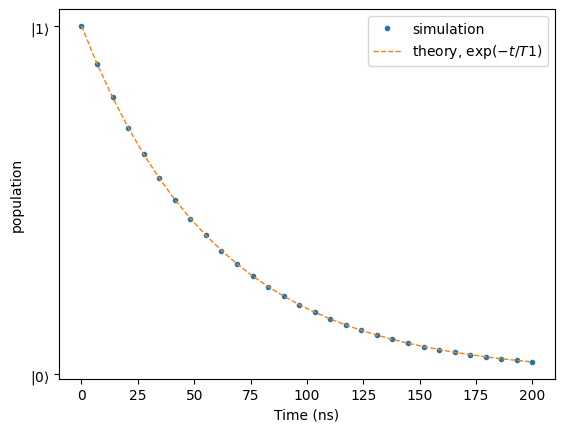

In [12]:
t = result.times
plt.figure(1)
plt.plot(t, result.expect[0], '.', linewidth=.5, label= r'simulation')
plt.plot(t, np.exp(-t/t1), '--', linewidth=1, label=r'theory, $\exp(-t/T1)$')
plt.yticks([0,1],[r'$|0\rangle$',r'$|1\rangle$'])
plt.xlabel(r'Time (ns)')
plt.ylabel(r'population')
plt.legend();

## Transversal relaxation

To measure the transversal relaxation of the qubit, we adjust our system to operate in a slightly detuned rotating frame. This is achieved by setting the `rotating_frame_frequencies` slightly off from the qubit's resonance frequency (5.1 GHz instead of 5.0 GHz). This detuning is needed for observing the effects of transversal relaxation $T_2$ in the presence of a rotating frame.

In [13]:
# Rotating frame freq in (GHz)
rotating_frame_frequencies = [2*np.pi*5.1] # detune the qubit slightly from its resonance freq
# Create the processor with the given hardware parameters
sarimner = SarimnerProcessor(num_qubits, qubit_frequencies, anharmonicities, rotating_frame_frequencies, t1=t1, t2=t2)

Next, we prepare the qubit in the plus-state that lies along the positive x-axis on the Bloch sphere, and we measure the expectation value of the number operator in the $X$-basis.

In [14]:
# Prepare qubit in plus state
rho = (basis(3,1) + basis(3,0)).unit()
Hadamard = 1/np.sqrt(2) * Qobj([[1,1,0],[1,-1,0],[0,0,0]])
e_ops = [Hadamard*a.dag()*a*Hadamard]
# Transmon Hamiltonian with a slight detuning
t_total = 120 # in (ns)
tlist = np.linspace(0, t_total, 500)
# master equation simulation
result = sarimner.run_state(rho, tlist=tlist, e_ops=e_ops)

Finally, we plot the results and compare the simulation to our theoretical prediction.

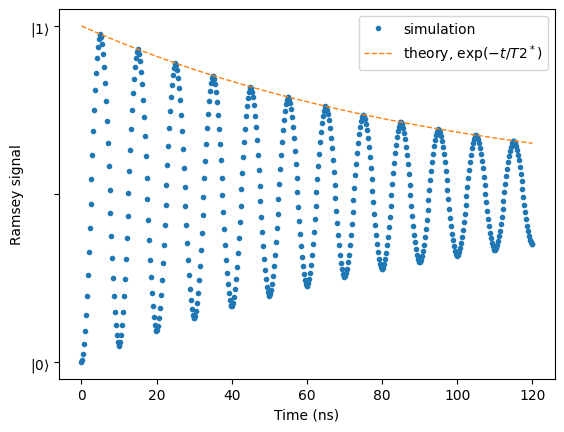

In [15]:
fig, ax = plt.subplots()
# detail about lenght of tlist needs to be fixed
ax.plot(tlist, result.expect[0], '.', linewidth = .5, label="simulation")
ax.plot(tlist, (np.exp(-tlist/(t2))+1)/2, '--', linewidth = 1, label=r"theory, $\exp(-t/T2^*)$")
plt.yticks([0,.5,1], [r'$|0\rangle$','',r'$|1\rangle$'])
plt.xlabel(r"Time (ns)")
plt.ylabel(r"Ramsey signal")
plt.legend()